In [89]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t

# Import data

In [90]:
MKT1=pd.read_excel("Asset Class Return and Correlation.xlsx", sheet_name='MKT1')
MKT1

,#,Sub-Asset Class,Current,Benchmark,Vol,Corr1,Corr2,Corr3,Corr4,Corr5,...,Corr11,Corr12,Corr13,Corr14,Corr15,Corr16,Corr17,Corr18,Corr19,Corr20
0,1.0,US Equity,0.0950,0.095,0.155538,1.000000,0.876957,0.768382,0.961318,-0.182079,...,0.582099,0.637035,0.730333,0.440342,0.047591,0.825298,0.829893,0.876477,-0.202017,-0.082459
1,2.0,Global ex-US Equity,0.0950,0.105,0.162707,0.876957,1.000000,0.940256,0.924674,-0.120014,...,0.603882,0.654370,0.733932,0.594787,0.213060,0.785777,0.763248,0.893564,-0.288824,-0.059502
2,3.0,Emerging Market Equity,0.0300,0.030,0.216296,0.768382,0.940256,1.000000,0.822570,-0.076848,...,0.507998,0.608030,0.646700,0.614465,0.320070,0.673602,0.667918,0.815144,-0.276759,-0.045708
3,4.0,Global Private Equity,0.1800,0.170,0.172175,0.961318,0.924674,0.822570,1.000000,-0.178895,...,0.628447,0.663391,0.699366,0.528893,0.122175,0.844992,0.832160,0.902249,-0.233284,-0.071042
4,5.0,US Aggregate Bonds,0.0150,0.010,0.038878,-0.182079,-0.120014,-0.076848,-0.178895,1.000000,...,-0.260610,-0.181274,0.099171,-0.100381,0.310256,0.040803,0.049354,-0.199143,0.272259,0.223997
5,6.0,US Long Treasuries,0.0700,0.080,0.142189,-0.284182,-0.255087,-0.216036,-0.296341,0.907187,...,-0.344563,-0.308912,0.014603,-0.246851,0.174866,-0.050743,-0.045074,-0.337768,0.173949,0.102415
6,7.0,Emerging Market Debt,0.0125,0.020,0.064784,0.507052,0.677614,0.704336,0.574886,0.430995,...,0.377234,0.407935,0.584858,0.476209,0.443253,0.612772,0.605426,0.557031,-0.037717,0.159842
7,8.0,US High Yield,0.0225,0.025,0.039156,0.658475,0.715413,0.657716,0.704718,0.135886,...,0.689686,0.609171,0.611197,0.461405,0.233905,0.665354,0.653790,0.695227,-0.069242,0.113287
8,9.0,US ILBs,0.1050,0.100,0.054683,0.119265,0.245347,0.296980,0.174060,0.688793,...,0.100846,0.142436,0.297016,0.302521,0.483448,0.298139,0.298076,0.182636,0.110679,0.181660
9,10.0,Non-US ILBs,0.0200,0.020,0.068599,0.127896,0.166087,0.161147,0.125480,0.535703,...,0.101822,0.086870,0.364494,0.046253,0.172126,0.336123,0.339284,0.135717,-0.034998,0.146889


In [91]:
MKT2=pd.read_excel("Asset Class Return and Correlation.xlsx", sheet_name='MKT2')
MKT2

,#,Sub-Asset Class,Current,Benchmark,Vol,Corr1,Corr2,Corr3,Corr4,Corr5,...,Corr11,Corr12,Corr13,Corr14,Corr15,Corr16,Corr17,Corr18,Corr19,Corr20
0,1.0,US Equity,0.0950,0.095,0.297405,1.000000,0.924789,0.901161,0.968036,0.632077,...,0.759869,0.905350,0.919104,0.811037,0.457046,0.871970,0.869551,0.909067,-0.398021,0.065928
1,2.0,Global ex-US Equity,0.0950,0.105,0.332264,0.924789,1.000000,0.972268,0.978589,0.763646,...,0.762207,0.954115,0.868596,0.916947,0.641966,0.939973,0.905099,0.960507,-0.422269,0.129932
2,3.0,Emerging Market Equity,0.0300,0.030,0.295713,0.901161,0.972268,1.000000,0.935647,0.687942,...,0.752385,0.887062,0.831236,0.883384,0.554382,0.883960,0.857992,0.926616,-0.388893,0.159883
3,4.0,Global Private Equity,0.1800,0.170,0.398484,0.968036,0.978589,0.935647,1.000000,0.745690,...,0.768123,0.969372,0.905340,0.891863,0.605417,0.943229,0.916054,0.956742,-0.438021,0.082424
4,5.0,US Aggregate Bonds,0.0150,0.010,0.069721,0.632077,0.763646,0.687942,0.745690,1.000000,...,0.567882,0.813406,0.726850,0.748533,0.826988,0.864001,0.848012,0.800258,-0.152084,0.393969
5,6.0,US Long Treasuries,0.0700,0.080,0.239327,0.252349,0.472941,0.388303,0.429884,0.850282,...,0.165029,0.528408,0.325880,0.536089,0.843851,0.598292,0.541748,0.482993,0.023032,0.387903
6,7.0,Emerging Market Debt,0.0125,0.020,0.160971,0.883686,0.921881,0.907490,0.909470,0.738085,...,0.903486,0.887275,0.910784,0.835243,0.538984,0.910731,0.917312,0.952689,-0.464987,0.219938
7,8.0,US High Yield,0.0225,0.025,0.207761,0.882227,0.835089,0.843486,0.848313,0.520840,...,0.925096,0.787704,0.884483,0.722139,0.288622,0.791811,0.819255,0.880044,-0.526243,0.091733
8,9.0,US ILBs,0.1050,0.100,0.131588,0.630484,0.757935,0.660338,0.756103,0.905143,...,0.402005,0.850821,0.650039,0.786791,0.847801,0.802027,0.746425,0.721340,-0.115364,0.172042
9,10.0,Non-US ILBs,0.0200,0.020,0.161915,0.603173,0.772110,0.697710,0.751211,0.898420,...,0.568780,0.820704,0.663597,0.774605,0.814757,0.851892,0.801423,0.795763,-0.328949,0.235934


In [92]:
retasum=pd.read_excel("Asset Class Return and Correlation.xlsx", sheet_name='30YR ANNUAL RETURN ASSUMPTIONS')
retasum

,#,Sub-Asset Class,Real Return,Unnamed: 3,#.1,Sub-Asset Class.1,Nominal Return
0,1,US Equity,0.040,NaN,1,US Equity,0.075
1,2,Global ex-US Equity,0.041,NaN,2,Global ex-US Equity,0.076
2,3,Emerging Market Equity,0.047,NaN,3,Emerging Market Equity,0.082
3,4,Global Private Equity,0.070,NaN,4,Global Private Equity,0.105
4,5,US Aggregate Bonds,0.002,NaN,5,US Aggregate Bonds,0.037
5,6,US Long Treasuries,0.000,NaN,6,US Long Treasuries,0.035
6,7,Emerging Market Debt,-0.003,NaN,7,Emerging Market Debt,0.032
7,8,US High Yield,0.024,NaN,8,US High Yield,0.059
8,9,US ILBs,0.000,NaN,9,US ILBs,0.035
9,10,Non-US ILBs,-0.009,NaN,10,Non-US ILBs,0.026


In [93]:
corr1=MKT1.loc[0:19, 'Corr1':'Corr20']
corr2=MKT2.loc[0:19, 'Corr1':'Corr20']
corr1

,Corr1,Corr2,Corr3,Corr4,Corr5,Corr6,Corr7,Corr8,Corr9,Corr10,Corr11,Corr12,Corr13,Corr14,Corr15,Corr16,Corr17,Corr18,Corr19,Corr20
0,1.000000,0.876957,0.768382,0.961318,-0.182079,-0.284182,0.507052,0.658475,0.119265,0.127896,0.582099,0.637035,0.730333,0.440342,0.047591,0.825298,0.829893,0.876477,-0.202017,-0.082459
1,0.876957,1.000000,0.940256,0.924674,-0.120014,-0.255087,0.677614,0.715413,0.245347,0.166087,0.603882,0.654370,0.733932,0.594787,0.213060,0.785777,0.763248,0.893564,-0.288824,-0.059502
2,0.768382,0.940256,1.000000,0.822570,-0.076848,-0.216036,0.704336,0.657716,0.296980,0.161147,0.507998,0.608030,0.646700,0.614465,0.320070,0.673602,0.667918,0.815144,-0.276759,-0.045708
3,0.961318,0.924674,0.822570,1.000000,-0.178895,-0.296341,0.574886,0.704718,0.174060,0.125480,0.628447,0.663391,0.699366,0.528893,0.122175,0.844992,0.832160,0.902249,-0.233284,-0.071042
4,-0.182079,-0.120014,-0.076848,-0.178895,1.000000,0.907187,0.430995,0.135886,0.688793,0.535703,-0.260610,-0.181274,0.099171,-0.100381,0.310256,0.040803,0.049354,-0.199143,0.272259,0.223997
5,-0.284182,-0.255087,-0.216036,-0.296341,0.907187,1.000000,0.242088,-0.056837,0.526194,0.533152,-0.344563,-0.308912,0.014603,-0.246851,0.174866,-0.050743,-0.045074,-0.337768,0.173949,0.102415
6,0.507052,0.677614,0.704336,0.574886,0.430995,0.242088,1.000000,0.714344,0.594851,0.417022,0.377234,0.407935,0.584858,0.476209,0.443253,0.612772,0.605426,0.557031,-0.037717,0.159842
7,0.658475,0.715413,0.657716,0.704718,0.135886,-0.056837,0.714344,1.000000,0.393658,0.229696,0.689686,0.609171,0.611197,0.461405,0.233905,0.665354,0.653790,0.695227,-0.069242,0.113287
8,0.119265,0.245347,0.296980,0.174060,0.688793,0.526194,0.594851,0.393658,1.000000,0.606353,0.100846,0.142436,0.297016,0.302521,0.483448,0.298139,0.298076,0.182636,0.110679,0.181660
9,0.127896,0.166087,0.161147,0.125480,0.535703,0.533152,0.417022,0.229696,0.606353,1.000000,0.101822,0.086870,0.364494,0.046253,0.172126,0.336123,0.339284,0.135717,-0.034998,0.146889


In [94]:
vol1=MKT1.loc[0:19, 'Vol']
vol2=MKT2.loc[0:19, 'Vol']
vol2

0     0.297405
1     0.332264
2     0.295713
3     0.398484
4     0.069721
5     0.239327
6     0.160971
7     0.207761
8     0.131588
9     0.161915
10    0.177541
11    0.749390
12    0.255199
13    0.212633
14    0.205968
15    0.407404
16    0.380924
17    0.092103
18    0.000829
19    0.002352
Name: Vol, dtype: float64

In [95]:
ret_mean=retasum.loc[:,'Nominal Return']
ret_mean

0     0.075
1     0.076
2     0.082
3     0.105
4     0.037
5     0.035
6     0.032
7     0.059
8     0.035
9     0.026
10    0.071
11    0.075
12    0.075
13    0.060
14    0.032
15    0.064
16    0.067
17    0.060
18    0.030
19    0.000
Name: Nominal Return, dtype: float64

In [96]:
# weights in a series with index values
wc=pd.Series(data=MKT1.loc[0:19, 'Current'].values,index=MKT1['Sub-Asset Class'][0:20])
wb=pd.Series(data=MKT1.loc[0:19, 'Benchmark'].values,index=MKT1['Sub-Asset Class'][0:20])
wb

Sub-Asset Class
US Equity                 0.095
Global ex-US Equity       0.105
Emerging Market Equity    0.030
Global Private Equity     0.170
US Aggregate Bonds        0.010
US Long Treasuries        0.080
Emerging Market Debt      0.020
US High Yield             0.025
US ILBs                   0.100
Non-US ILBs               0.020
Private Credit            0.075
MLPs                      0.000
Infrastructure            0.075
Commodities               0.030
Gold                      0.060
REITs                     0.025
Private Real Estate       0.100
Absolute Return           0.060
Cash                      0.030
Financing                -0.110
dtype: float64

In [97]:
# Benchmark's total equity, fixed income, real assets, liquidity source, illiquid assets, foreign exposure
toleq = sum(wb[0:4])
tolfix = sum(wb[4:11])
tolreal = sum(wb[11:17])
tolliq = sum(wb[4:6])+wb[8]+wb[18]
tolilliq = wb[3]+wb[10]+wb[16]
tolfor = wb[1]+wb[2]+wb[3]+wb[6]+wb[9]+wb[12]+sum(wb[15:18])

In [98]:
# diagonalize standard deviations
vol1_d=np.diag(vol1.to_numpy())
vol2_d=np.diag(vol2.to_numpy())
vol2_d

array([[0.29740511, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33226429, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.29571337, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.39848396, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [99]:
#covariance matrix
cov1=np.dot(np.dot(vol1_d, corr1),vol1_d)
cov2=np.dot(np.dot(vol2_d, corr2),vol2_d)
cov2

array([[ 8.84497982e-02,  9.13849150e-02,  7.92540904e-02,
         1.14723025e-01,  1.31063692e-02,  1.79614641e-02,
         4.23051750e-02,  5.45121335e-02,  2.46740536e-02,
         2.90454615e-02,  4.01222071e-02,  2.01777683e-01,
         6.97575691e-02,  5.12885554e-02,  2.79968584e-02,
         1.05651277e-01,  9.85103195e-02,  2.49010460e-02,
        -9.80791290e-05,  4.61083192e-05],
       [ 9.13849150e-02,  1.10399556e-01,  9.55301756e-02,
         1.29567150e-01,  1.76904873e-02,  3.76081614e-02,
         4.93066825e-02,  5.76475707e-02,  3.31385434e-02,
         4.15384826e-02,  4.49628939e-02,  2.37570544e-01,
         7.36511598e-02,  6.47827094e-02,  4.39335964e-02,
         1.27239998e-01,  1.14556045e-01,  2.93939157e-02,
        -1.16250398e-04,  1.01522751e-04],
       [ 7.92540904e-02,  9.55301756e-02,  8.74463984e-02,
         1.10253905e-01,  1.41836077e-02,  2.74810124e-02,
         4.31976209e-02,  5.18218952e-02,  2.56953816e-02,
         3.34067164e-02,  3.9

# Compute a mean-variance efficient frontier

## Portfolio return, standard deviation, and sharpe ratio funciton

In [100]:
def portfolio1(a1):
    ret=np.dot(ret_mean,a1)
    std=np.dot(a1.T, np.dot(cov1, a1))**0.5
    sharpe=(ret-0.035)/std          
    return ret,std,sharpe
# assume the annual interest rate is 0.035
# MKT1 environment

In [101]:
def portfolio2(a1):
    ret=np.dot(ret_mean,a1)
    std=np.dot(a1.T, np.dot(cov2, a1))**0.5
    sharpe=(ret-0.035)/std          
    return ret,std,sharpe
# assume the annual interest rate is 0.035
# MKT2 environment

In [102]:
# ret, std, and sharpe ratio of the current portfolio (MKT1)
retc1,stdc1,sharpec1=portfolio1(wc)

In [103]:
# ret, std, and sharpe ratio of the benchmark portfolio (MKT1)
retb1,stdb1,sharpeb1=portfolio1(wb)

In [104]:
# ret, std, and sharpe ratio of the current portfolio (MKT2)
retc2,stdc2,sharpec2=portfolio2(wc)

In [105]:
# ret, std, and sharpe ratio of the benchmark portfolio (MKT2)
retb2,stdb2,sharpeb2=portfolio2(wb)

## 10000 simulated portfolios

In [106]:
np.random.seed(0)
# 10000*19 random numbers from a uniform distribution over (0, 1)
# 10000*1 random numbers from a uniform distribution over (-1, 1) for leverage
a2_1=np.random.uniform(0, 1, (10000,19))
a2_2=np.random.uniform(-1, 1, (10000,1))
a2=np.concatenate((a2_1, a2_2), axis=1)
a2

array([[ 0.5488135 ,  0.71518937,  0.60276338, ...,  0.83261985,
         0.77815675,  0.00563101],
       [ 0.87001215,  0.97861834,  0.79915856, ...,  0.61209572,
         0.616934  ,  0.58680702],
       [ 0.94374808,  0.6818203 ,  0.3595079 , ...,  0.16130952,
         0.65310833,  0.93031905],
       ...,
       [ 0.17409964,  0.32134109,  0.02477255, ...,  0.7650357 ,
         0.08959149, -0.57075103],
       [ 0.65436819,  0.41561544,  0.23175515, ...,  0.79232589,
         0.38200342, -0.40844677],
       [ 0.05305505,  0.86113613,  0.77410765, ...,  0.16199704,
         0.32021641,  0.68500838]])

In [107]:
# normalize the weights 
# sum of the weights is 1
for i in range(len(a2)):
    a2[i]=(a2[i]/sum(a2[i]))
a2

array([[ 0.05097316,  0.06642596,  0.05598396, ...,  0.07733276,
         0.07227429,  0.000523  ],
       [ 0.07776185,  0.0874691 ,  0.07142895, ...,  0.05470923,
         0.05514168,  0.05244892],
       [ 0.09842348,  0.07110703,  0.03749308, ...,  0.01682297,
         0.06811266,  0.09702296],
       ...,
       [ 0.03295805,  0.0608317 ,  0.00468959, ...,  0.14482561,
         0.01696018, -0.10804642],
       [ 0.0692717 ,  0.04399723,  0.0245337 , ...,  0.08387596,
         0.04043905, -0.04323835],
       [ 0.00632143,  0.10260304,  0.09223373, ...,  0.0193017 ,
         0.03815329,  0.08161769]])

In [108]:
# Portfolio return, standard deviation, and sharpe ratio funciton for 10000 portfolios
# MKT1 environment
def portfolios1(a2):
    df=pd.DataFrame(data={'ret':np.zeros(len(a2)),'std':np.zeros(len(a2)),'sharpe':np.zeros(len(a2))})
    for i in range(len(a2)):
        df['ret'][i]=np.dot(ret_mean,a2[i])
        df['std'][i]=np.dot(a2[i].T, np.dot(cov1, a2[i]))**0.5
        df['sharpe'][i]=(df['ret'][i]-0.035)/df['std'][i]          
    return df

In [109]:
# Portfolio return, standard deviation, and sharpe ratio funciton for 10000 portfolios
# MKT2 environment
def portfolios2(a2):
    df=pd.DataFrame(data={'ret':np.zeros(len(a2)),'std':np.zeros(len(a2)),'sharpe':np.zeros(len(a2))})
    for i in range(len(a2)):
        df['ret'][i]=np.dot(ret_mean,a2[i])
        df['std'][i]=np.dot(a2[i].T, np.dot(cov2, a2[i]))**0.5
        df['sharpe'][i]=(df['ret'][i]-0.035)/df['std'][i]          
    return df

In [110]:
simport1=portfolios1(a2)
simport1
#MKT1 10000 simulated portfolios

,ret,std,sharpe
0,0.058261,0.071477,0.325428
1,0.054783,0.080595,0.245467
2,0.051904,0.074180,0.227876
3,0.057790,0.094146,0.242069
4,0.055524,0.071339,0.287705
...,...,...,...
9995,0.057638,0.077495,0.292123
9996,0.061975,0.090026,0.299631
9997,0.054852,0.076943,0.258009
9998,0.062728,0.092722,0.299041


In [111]:
simport2=portfolios2(a2)
simport2
#MKT2 10000 simulated portfolios

,ret,std,sharpe
0,0.058261,0.203418,0.114349
1,0.054783,0.197125,0.100360
2,0.051904,0.194364,0.086970
3,0.057790,0.278005,0.081976
4,0.055524,0.189411,0.108359
...,...,...,...
9995,0.057638,0.204476,0.110712
9996,0.061975,0.254808,0.105863
9997,0.054852,0.207773,0.095546
9998,0.062728,0.275852,0.100517


# Optimization algorithm

In [112]:
# the objective function to be minimized
# maximize the sharpe ratio is equivalent to minimize the negative sharpe ratio
# MKT1 environment
def neg_sharpe1(weight):
    ret=np.dot(ret_mean,weight)
    std=np.dot(weight.T, np.dot(cov1, weight))**0.5
    sharpe=(ret-0.035)/std       
    return -sharpe

In [113]:
# the objective function to be minimized
# maximize the sharpe ratio is equivalent to minimize the negative sharpe ratio
# MKT2 environment
def neg_sharpe2(weight):
    ret=np.dot(ret_mean,weight)
    std=np.dot(weight.T, np.dot(cov2, weight))**0.5
    sharpe=(ret-0.035)/std       
    return -sharpe

In [114]:
# sum of the weights minus one is zero 
def sum_weight(weight):
    return np.sum(weight)-1

In [115]:
# target return 7%
def target_return(weight):
    return np.dot(ret_mean,weight)-0.07

In [116]:
# Set upper bound of total equity, total fixed income, and total real asset weights (+5%)
# Set upper bound of illiquid assets and foreign exposure (lower than benchmark)
def ConstraintIneqUpBounds(weight):
    A= [[1,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],                           # Total equity
        [0,0,0,0,1, 1,1,1,1,1, 1,0,0,0,0, 0,0,0,0,0],                           # Total fixed income
        [0,0,0,0,0, 0,0,0,0,0, 0,1,1,1,1, 1,1,0,0,0],                           # Total real asset
        [0,0,0,1,0, 0,0,0,0,0, 1,0,0,0,0, 0,1,0,0,0],                           # Total illiquid asset
        [0,1,1,1,0, 0,1,0,0,1, 0,0,1,0,0, 1,1,1,0,0]]                           # Total foreign exposure 
    bUpBounds= np.array([toleq+0.05,tolfix+0.05,tolreal+0.05,tolilliq,tolfor]).T
    constraintValUpBounds = bUpBounds-np.matmul(A,weight.T)
    return constraintValUpBounds

In [117]:
# Set lower bound of total equity, total fixed income, and total real asset weights (-5%), liquidity source
def ConstraintIneqLowBounds(weight):
    A= [[1,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],                   # Total equity
        [0,0,0,0,1, 1,1,1,1,1, 1,0,0,0,0, 0,0,0,0,0],                   # Total fixed income
        [0,0,0,0,0, 0,0,0,0,0, 0,1,1,1,1, 1,1,0,0,0],                   # Total real asset
        [0,0,0,0,1, 1,0,0,1,0, 0,0,0,0,0, 0,0,0,1,0]]                   # Liquididty source
    bLowBounds =np.array([toleq-0.05,tolfix-0.05,tolreal-0.05,tolliq]).T
    constraintValLowBounds = np.matmul(A,weight.T)-bLowBounds
    return constraintValLowBounds

In [118]:
# constraint type: 'eq' represents equality
# the function sum_weight defines the constraint
# equality constraint means that the constraint function result is to be zero 
# inequalities (ineq) constraint means that the funciton result must be non-negative
constraint = ({'type':'eq','fun': sum_weight},{'type':'ineq','fun': target_return},
              {'type':'ineq','fun': ConstraintIneqUpBounds},{'type':'ineq','fun': ConstraintIneqLowBounds})

In [119]:
# lower and upper bounds 
# sequence of (min, max) pairs for each element
# with constraints
# public assets: 
bound = ((wb[0]*0.8, wb[0]*1.2), (wb[1]*0.8, wb[1]*1.2), (wb[2]*0.8, wb[2]*1.2), (wb[3]*0.7, wb[3]*1.3),(wb[4]*0.8, wb[4]*1.2), 
         (wb[5]*0.8, wb[5]*1.2), (wb[6]*0.8, wb[6]*1.2), (wb[7]*0.8, wb[7]*1.2),(wb[8]*0.8, wb[8]*1.2),(wb[9]*0.8, wb[9]*1.2),
         (wb[10]*0.7, wb[10]*1.3), (0, 0.02), (wb[12]*0.8, wb[12]*1.2), (wb[13]*0.8, wb[13]*1.2),(wb[14]*0.8, wb[14]*1.2), 
         (wb[15]*0.8, wb[15]*1.2), (wb[16]*0.7, wb[16]*1.3), (wb[17]*0.8, wb[17]*1.2),(wb[18]*0.8, wb[18]*1.2),(wb[19]*1.2, wb[19]*0.8))

In [120]:
# initial guess of weights  
a1=np.array([1/20]*20)
a1

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [121]:
optimal1=minimize(fun=neg_sharpe1, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint)
optimal1
# SLSQP stands for sequential least squares programming
# SLSQP method minimizes a function of several variables with bounds and constraints
# fun is the value of objective function
# MKT1 environment

     fun: -0.391423646231479
     jac: array([-2.09069155e-01, -1.73973396e-01, -9.36523713e-02, -4.33599867e-01,
       -3.62528969e-01, -3.77228215e-01, -1.32380430e-01, -4.82359201e-01,
       -2.63294797e-01, -1.71326451e-01, -6.57763105e-01, -2.89293576e-01,
       -4.03354112e-01, -2.28487030e-01, -1.06397890e-01, -3.14052254e-02,
       -2.45855339e-02, -3.62253219e-01, -3.07606410e-01, -2.74658203e-04])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 0.076 ,  0.084 ,  0.024 ,  0.1775,  0.012 ,  0.096 ,  0.016 ,
        0.03  ,  0.1125,  0.016 ,  0.0975,  0.02  ,  0.09  ,  0.0345,
        0.048 ,  0.02  ,  0.07  ,  0.072 ,  0.036 , -0.132 ])

In [122]:
# weights in a series with index values
wo1=pd.Series(data=optimal1["x"],index=MKT1['Sub-Asset Class'][0:20])
wo1

Sub-Asset Class
US Equity                 0.0760
Global ex-US Equity       0.0840
Emerging Market Equity    0.0240
Global Private Equity     0.1775
US Aggregate Bonds        0.0120
US Long Treasuries        0.0960
Emerging Market Debt      0.0160
US High Yield             0.0300
US ILBs                   0.1125
Non-US ILBs               0.0160
Private Credit            0.0975
MLPs                      0.0200
Infrastructure            0.0900
Commodities               0.0345
Gold                      0.0480
REITs                     0.0200
Private Real Estate       0.0700
Absolute Return           0.0720
Cash                      0.0360
Financing                -0.1320
dtype: float64

In [123]:
# ret, std, and sharpe ratio of the optimal portfolio (MKT1)
reto1,stdo1,sharpeo1=portfolio1(optimal1["x"])

In [124]:
optimal2=minimize(fun=neg_sharpe2, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint)
optimal2
# SLSQP stands for sequential least squares programming
# SLSQP method minimizes a function of several variables with bounds and constraints
# fun is the value of objective function
# MKT2 environment

     fun: -0.15371040889369975
     jac: array([-0.123775  , -0.1005338 , -0.15264638, -0.17228203, -0.10875513,
       -0.06199014, -0.03399044, -0.12309987, -0.07316285, -0.02258558,
       -0.1895506 ,  0.14420736, -0.14872796, -0.11724523, -0.04182887,
       -0.01073574, -0.04153349, -0.17818614, -0.11606277,  0.0002154 ])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 1.14000000e-01,  8.90000000e-02,  3.60000000e-02,  1.77500000e-01,
        1.20000000e-02,  6.40000000e-02,  1.60000000e-02,  3.00000000e-02,
        1.08000000e-01,  1.60000000e-02,  9.75000000e-02,  4.79798473e-16,
        9.00000000e-02,  3.60000000e-02,  4.80000000e-02,  2.00000000e-02,
        7.00000000e-02,  7.20000000e-02,  3.60000000e-02, -1.32000000e-01])

In [125]:
# weights in a series with index values
wo2=pd.Series(data=optimal2["x"],index=MKT1['Sub-Asset Class'][0:20])
wo2

Sub-Asset Class
US Equity                 1.140000e-01
Global ex-US Equity       8.900000e-02
Emerging Market Equity    3.600000e-02
Global Private Equity     1.775000e-01
US Aggregate Bonds        1.200000e-02
US Long Treasuries        6.400000e-02
Emerging Market Debt      1.600000e-02
US High Yield             3.000000e-02
US ILBs                   1.080000e-01
Non-US ILBs               1.600000e-02
Private Credit            9.750000e-02
MLPs                      4.797985e-16
Infrastructure            9.000000e-02
Commodities               3.600000e-02
Gold                      4.800000e-02
REITs                     2.000000e-02
Private Real Estate       7.000000e-02
Absolute Return           7.200000e-02
Cash                      3.600000e-02
Financing                -1.320000e-01
dtype: float64

In [126]:
# ret, std, and sharpe ratio of the optimal portfolio (MKT2)
reto2,stdo2,sharpeo2=portfolio2(optimal2["x"])

## Proposed portfolio

In [127]:
# proposed portfolio
# equally weighted the optimal portfolios of MKT1 and MKT2
wop=(wo1*0.25+wo2*0.75)
wop

Sub-Asset Class
US Equity                 0.104500
Global ex-US Equity       0.087750
Emerging Market Equity    0.033000
Global Private Equity     0.177500
US Aggregate Bonds        0.012000
US Long Treasuries        0.072000
Emerging Market Debt      0.016000
US High Yield             0.030000
US ILBs                   0.109125
Non-US ILBs               0.016000
Private Credit            0.097500
MLPs                      0.005000
Infrastructure            0.090000
Commodities               0.035625
Gold                      0.048000
REITs                     0.020000
Private Real Estate       0.070000
Absolute Return           0.072000
Cash                      0.036000
Financing                -0.132000
dtype: float64

In [128]:
# ret, std, and sharpe ratio of the combined optimal portfolio (MKT1)
retop1,stdop1,sharpeop1=portfolio1(wop)

In [129]:
# ret, std, and sharpe ratio of the combined optimal portfolio (MKT2)
retop2,stdop2,sharpeop2=portfolio2(wop)

In [130]:
# summarize MKT1 
mkt1_dict = {'MKT1':['Return (%)', 'Standard Deviation (%)', 'Sharpe Ratio'],
             'Proposed':[retop1*100,stdop1*100,sharpeop1],
             'Current':[retc1*100,stdc1*100,sharpec1],
             'Benchmark':[retb1*100,stdb1*100,sharpeb1]
            }
mkt1_df = pd.DataFrame(mkt1_dict)
mkt1_df = mkt1_df.set_index('MKT1')
round(mkt1_df,2)

,Proposed,Current,Benchmark
MKT1,,,
Return (%),7.44,7.25,7.22
Standard Deviation (%),10.25,10.49,10.46
Sharpe Ratio,0.38,0.36,0.36


In [131]:
# summarize MKT2 
mkt2_dict = {'MKT2':['Return (%)', 'Standard Deviation (%)', 'Sharpe Ratio'],
             'Proposed':[retop2*100,stdop2*100,sharpeop2],
             'Current':[retc2*100,stdc2*100,sharpec2],
             'Benchmark':[retb2*100,stdb2*100,sharpeb2]
            }
mkt2_df = pd.DataFrame(mkt2_dict)
mkt2_df = mkt2_df.set_index('MKT2')
round(mkt2_df,2)

,Proposed,Current,Benchmark
MKT2,,,
Return (%),7.44,7.25,7.22
Standard Deviation (%),25.98,26.06,26.13
Sharpe Ratio,0.15,0.14,0.14


# Visualize the portfolios

## MKT 1

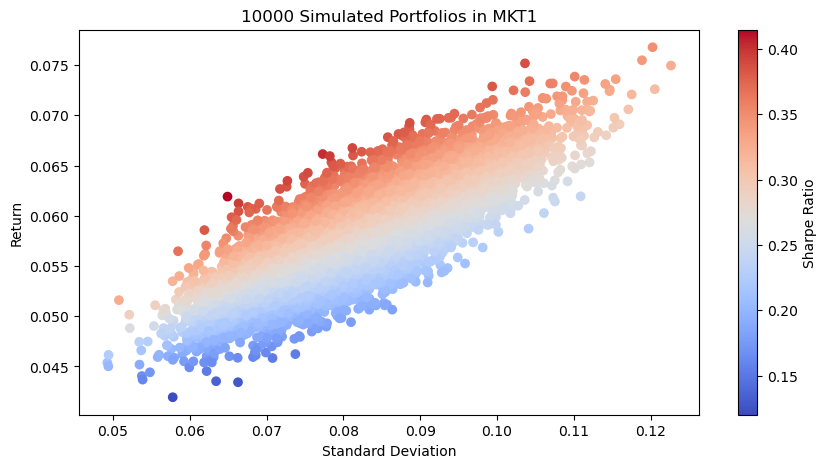

In [132]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport1["std"],y=simport1["ret"],c=simport1["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('10000 Simulated Portfolios in MKT1');

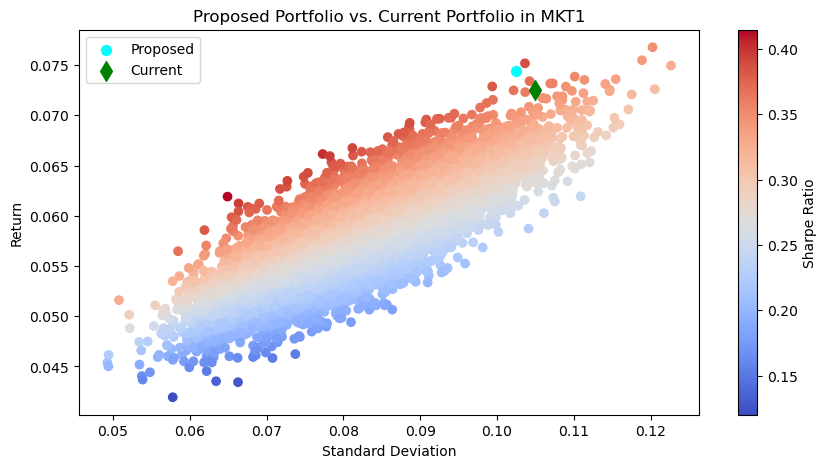

In [133]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport1["std"],y=simport1["ret"],c=simport1["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.scatter(x=stdop1,y=retop1,color="cyan",s=200, marker=".", label='Proposed')
plt.scatter(x=stdc1,y=retc1,color="green",s=100,marker="d", label='Current')
#plt.scatter(x=0,y=0.035,color="orange",s=100, marker="s", label='Risk-free')
#plt.plot([0,stdop1],[0.035,retop1],color="black")
#plt.plot([0,stdc1],[0.035,retc1],color="black")
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Proposed Portfolio vs. Current Portfolio in MKT1')
plt.legend();

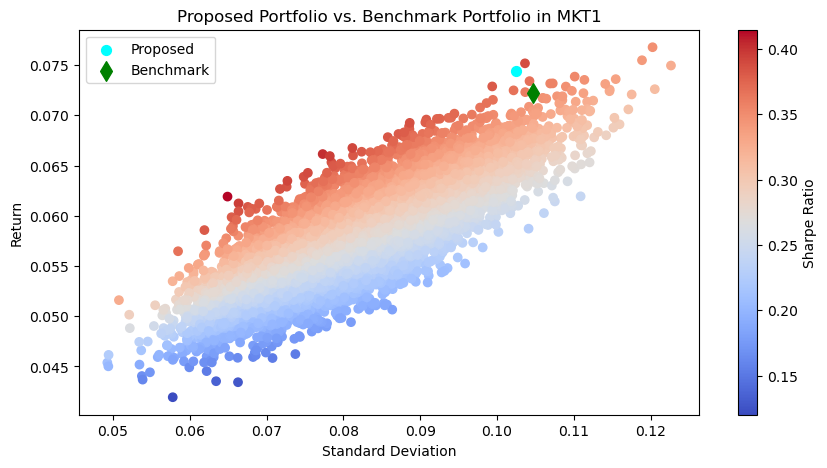

In [134]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport1["std"],y=simport1["ret"],c=simport1["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.scatter(x=stdop1,y=retop1,color="cyan",s=200, marker=".", label='Proposed')
plt.scatter(x=stdb1,y=retb1,color="green",s=100,marker="d", label='Benchmark')
#plt.scatter(x=0,y=0.035,color="orange",s=100, marker="s", label='Risk-free')
#plt.plot([0,stdop1],[0.035,retop1],color="black")
#plt.plot([0,stdb1],[0.035,retb1],color="black")
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Proposed Portfolio vs. Benchmark Portfolio in MKT1')
plt.legend();

## MKT2

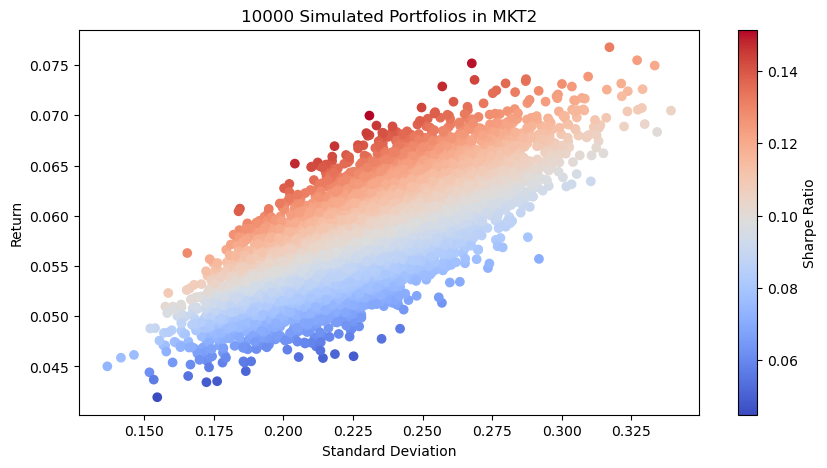

In [135]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport2["std"],y=simport2["ret"],c=simport2["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('10000 Simulated Portfolios in MKT2');

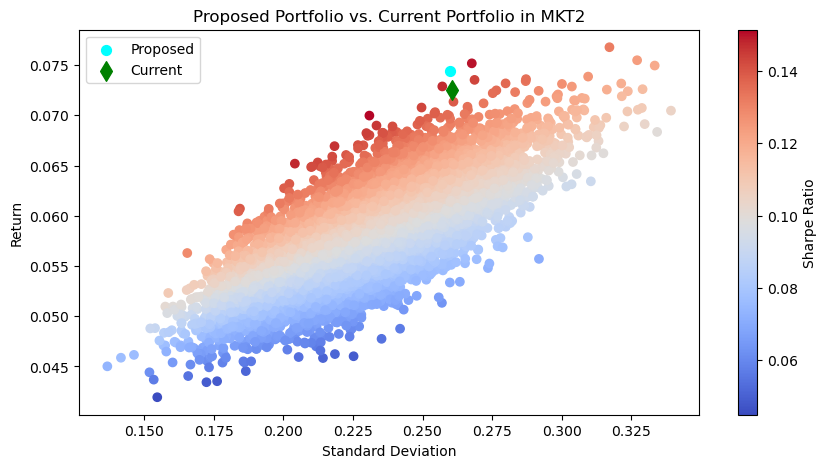

In [136]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport2["std"],y=simport2["ret"],c=simport2["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.scatter(x=stdop2,y=retop2,color="cyan",s=200, marker=".", label='Proposed')
plt.scatter(x=stdc2,y=retc2,color="green",s=100,marker="d", label='Current')
#plt.scatter(x=0,y=0.035,color="orange",s=100, marker="s", label='Risk-free')
#plt.plot([0,stdop2],[0.035,retop2],color="black")
#plt.plot([0,stdc2],[0.035,retc2],color="black")
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Proposed Portfolio vs. Current Portfolio in MKT2')
plt.legend();

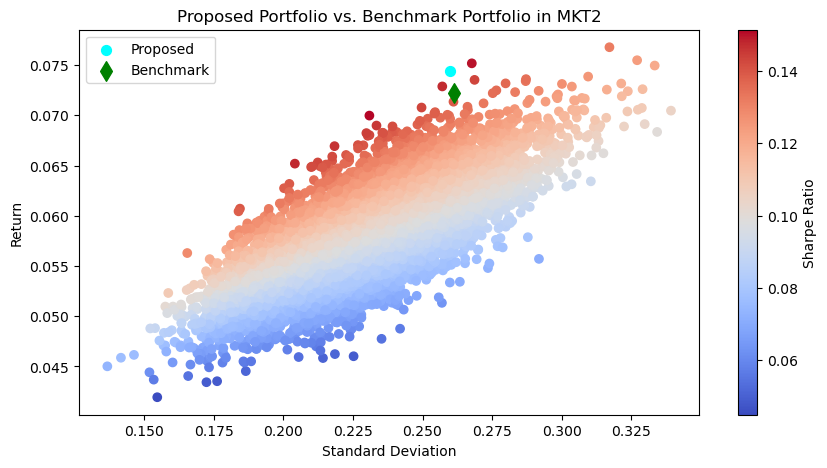

In [137]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport2["std"],y=simport2["ret"],c=simport2["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.scatter(x=stdop2,y=retop2,color="cyan",s=200, marker=".", label='Proposed')
plt.scatter(x=stdb2,y=retb2,color="green",s=100,marker="d", label='Benchmark')
#plt.scatter(x=0,y=0.035,color="orange",s=100, marker="s", label='Risk-free')
#plt.plot([0,stdop2],[0.035,retop2],color="black")
#plt.plot([0,stdb2],[0.035,retb2],color="black")
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Proposed Portfolio vs. Benchmark Portfolio in MKT2')
plt.legend();

## visualize the weights of asset classes

In [138]:
weight=pd.DataFrame({"Proposed (%)":wop,"Current (%)":wc,"Benchmark (%)":wb})
round(weight*100,2)

,Proposed (%),Current (%),Benchmark (%)
Sub-Asset Class,,,
US Equity,10.45,9.50,9.5
Global ex-US Equity,8.78,9.50,10.5
Emerging Market Equity,3.30,3.00,3.0
Global Private Equity,17.75,18.00,17.0
US Aggregate Bonds,1.20,1.50,1.0
US Long Treasuries,7.20,7.00,8.0
Emerging Market Debt,1.60,1.25,2.0
US High Yield,3.00,2.25,2.5
US ILBs,10.91,10.50,10.0


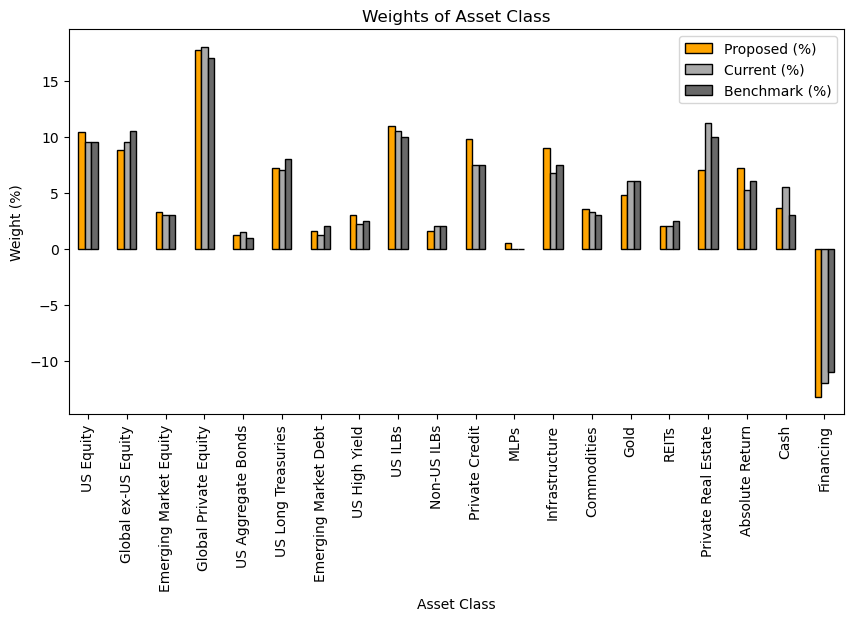

In [139]:
# plot(kind="bar")
c = ['orange','darkgray','dimgray']
round(weight*100,2).plot(kind="bar",figsize = (10,5), edgecolor='black', color=c)
plt.xlabel('Asset Class')
plt.ylabel('Weight (%)')
plt.title('Weights of Asset Class');
# plot a whole dataframe to a bar plot
# each column is assigned a distinct color
# each row is nested in a group along the horizontal axis

# Risk Measures

## Liquidity

In [140]:
# summarize liquid asset weight
liquiditysource = ['US Aggregate Bonds','US Long Treasuries','US ILBs','Cash']
liquid_df = weight.loc[liquiditysource,:]
liquid_sum = liquid_df.sum()
liquid_df.loc['Sum'] = liquid_sum
round(liquid_df*100,2)

,Proposed (%),Current (%),Benchmark (%)
Sub-Asset Class,,,
US Aggregate Bonds,1.20,1.5,1.0
US Long Treasuries,7.20,7.0,8.0
US ILBs,10.91,10.5,10.0
Cash,3.60,5.5,3.0
Sum,22.91,24.5,22.0


In [141]:
# summarize iliquid asset weight
illiquidasset = ['Global Private Equity','Private Credit','Private Real Estate']
illiquid_df = weight.loc[illiquidasset,:]
illiquid_sum = illiquid_df.sum()
illiquid_df.loc['Sum'] = illiquid_sum
round(illiquid_df*100,2)

,Proposed (%),Current (%),Benchmark (%)
Sub-Asset Class,,,
Global Private Equity,17.75,18.00,17.0
Private Credit,9.75,7.50,7.5
Private Real Estate,7.00,11.25,10.0
Sum,34.50,36.75,34.5


## Currency Risk

In [177]:
# summarize foreign asset weight
foreignasset = ['Global ex-US Equity','Emerging Market Equity','Global Private Equity','Emerging Market Debt',
                'Non-US ILBs','Infrastructure','REITs','Private Real Estate','Absolute Return']
foreign_df = weight.loc[foreignasset,:]
foreign_sum = foreign_df.sum()
foreign_df.loc['Sum'] = foreign_sum
round(foreign_df*100,2)

,Proposed (%),Current (%),Benchmark (%)
Sub-Asset Class,,,
Global ex-US Equity,8.78,9.50,10.5
Emerging Market Equity,3.30,3.00,3.0
Global Private Equity,17.75,18.00,17.0
Emerging Market Debt,1.60,1.25,2.0
Non-US ILBs,1.60,2.00,2.0
Infrastructure,9.00,6.75,7.5
REITs,2.00,2.00,2.5
Private Real Estate,7.00,11.25,10.0
Absolute Return,7.20,5.25,6.0


## Risk Attribution

In [143]:
def riskattr1(a1):
    std=np.dot(a1.T, np.dot(cov1, a1))**0.5
    marattr=np.dot(cov1, a1)/std            # Marginal attribution
    attr=marattr*a1                         # Asset attribution
    attrpercen=attr/np.sum(attr)            # Asset attribution percentage
    return attr,attrpercen
# MKT1 environment
# Risk attribution function

In [144]:
def riskattr2(a1):
    std=np.dot(a1.T, np.dot(cov2, a1))**0.5
    marattr=np.dot(cov2, a1)/std           # Marginal attribution
    attr=marattr*a1                        # Asset attribution
    attrpercen=attr/np.sum(attr)           # Asset attribution percentage
    return attr,attrpercen
# MKT2 environment
# Risk attribution function

In [145]:
# Total Risk Attribution for MKT 1
attrop1, attrpercenop1 = riskattr1(wop)
attrc1, attrpercenc1 = riskattr1(wc)
attrb1, attrpercenb1 = riskattr1(wb)

In [146]:
attr1 = pd.DataFrame({"Proposed (%)":attrop1,"Percentage(P)":attrpercenop1,"Current (%)":attrc1,"Percentage(C)":attrpercenc1,
                      "Benchmark":attrb1,"Percentage(B)":attrpercenb1})
round(attr1*100,2)

,Proposed (%),Percentage(P),Current (%),Percentage(C),Benchmark,Percentage(B)
Sub-Asset Class,,,,,,
US Equity,1.48,14.45,1.34,12.77,1.33,12.75
Global ex-US Equity,1.34,13.06,1.44,13.70,1.59,15.19
Emerging Market Equity,0.62,6.06,0.56,5.34,0.56,5.36
Global Private Equity,2.88,28.09,2.91,27.71,2.73,26.13
US Aggregate Bonds,0.00,0.03,0.00,0.04,0.00,0.03
US Long Treasuries,-0.08,-0.77,-0.07,-0.62,-0.06,-0.58
Emerging Market Debt,0.08,0.75,0.06,0.57,0.10,0.92
US High Yield,0.09,0.88,0.07,0.64,0.07,0.71
US ILBs,0.24,2.34,0.23,2.24,0.23,2.17


In [147]:
# Total Risk Attribution for MKT 2
attrop2, attrpercenop2 = riskattr2(wop)
attrc2, attrpercenc2 = riskattr2(wc)
attrb2, attrpercenb2 = riskattr2(wb)

In [148]:
attr2 = pd.DataFrame({"Proposed (%)":attrop2,"Percentage(P)":attrpercenop2,"Current (%)":attrc2,"Percentage(C)":attrpercenc2,
                      "Benchmark":attrb2,"Percentage(B)":attrpercenb2})
round(attr2*100,2)

,Proposed (%),Percentage(P),Current (%),Percentage(C),Benchmark,Percentage(B)
Sub-Asset Class,,,,,,
US Equity,2.91,11.20,2.63,10.08,2.62,10.04
Global ex-US Equity,2.85,10.97,3.08,11.83,3.41,13.04
Emerging Market Equity,0.91,3.50,0.82,3.16,0.82,3.16
Global Private Equity,6.97,26.82,7.04,27.04,6.65,25.44
US Aggregate Bonds,0.07,0.27,0.09,0.34,0.06,0.22
US Long Treasuries,0.90,3.48,0.91,3.48,1.04,3.99
Emerging Market Debt,0.24,0.93,0.19,0.72,0.30,1.15
US High Yield,0.53,2.03,0.39,1.50,0.43,1.66
US ILBs,1.15,4.42,1.12,4.28,1.06,4.07


In [149]:
# Active Risk Attribution for MKT 1
arattrop1, arattrpercenop1 = riskattr1(wop-wb)
arattrc1, arattrpercenc1 = riskattr1(wc-wb)

In [150]:
arattr1 = pd.DataFrame({"Proposed (%)":arattrop1,"Percentage(P)":arattrpercenop1,
                        "Current (%)":arattrc1,"Percentage(C)":arattrpercenc1})
round(arattr1*100,2)

,Proposed (%),Percentage(P),Current (%),Percentage(C)
Sub-Asset Class,,,,
US Equity,-0.03,-6.82,0.00,0.00
Global ex-US Equity,0.07,15.68,-0.02,-9.76
Emerging Market Equity,-0.02,-3.65,0.00,0.00
Global Private Equity,-0.03,-6.84,0.06,32.68
US Aggregate Bonds,-0.00,-0.84,-0.01,-6.78
US Long Treasuries,0.06,11.62,0.10,54.65
Emerging Market Debt,0.01,2.84,0.01,7.09
US High Yield,-0.00,-1.01,-0.00,-0.17
US ILBs,-0.02,-4.85,-0.01,-4.54


In [151]:
# Active Risk Attribution for MKT 2
arattrop2, arattrpercenop2 = riskattr2(wop-wb)
arattrc2, arattrpercenc2 = riskattr2(wc-wb)

In [152]:
arattr2 = pd.DataFrame({"Proposed (%)":arattrop2,"Percentage(P)":arattrpercenop2,
                        "Current (%)":arattrc2,"Percentage(C)":arattrpercenc2})
round(arattr2*100,2)

,Proposed (%),Percentage(P),Current (%),Percentage(C)
Sub-Asset Class,,,,
US Equity,0.02,3.09,-0.00,-0.00
Global ex-US Equity,0.09,12.32,0.15,87.23
Emerging Market Equity,-0.01,-1.20,-0.00,-0.00
Global Private Equity,-0.03,-3.54,-0.13,-74.85
US Aggregate Bonds,-0.01,-1.08,-0.02,-12.69
US Long Treasuries,0.16,21.75,0.17,96.79
Emerging Market Debt,0.00,0.53,0.05,31.12
US High Yield,0.02,3.14,0.01,7.15
US ILBs,-0.06,-8.01,-0.03,-18.47


## Value-at-Risk and Expected Shortfall

In [153]:
ve = np.array(['VaR (Normal distribution)','Expected Shortfall'])

In [154]:
confidence = 0.95

### MKT1

In [155]:
VaR_B1 = norm.ppf(1-confidence)*stdb1+retb1
VaR_B1

-0.09991614939010088

In [156]:
ES_B1 = stdb1*-norm.pdf(norm.ppf(1-confidence))/(1-confidence)+retb1
ES_B1

-0.14363805471615446

In [157]:
VaR_C1 = norm.ppf(1-confidence)*stdc1+retc1
VaR_C1

-0.10003606434119638

In [158]:
ES_C1 = stdc1*-norm.pdf(norm.ppf(1-confidence))/(1-confidence)+retc1
ES_C1

-0.14386909071172033

In [159]:
VaR_P1 = norm.ppf(1-confidence)*stdop1+retop1
VaR_P1

-0.09415394702715553

In [160]:
ES_P1 = stdop1*-norm.pdf(norm.ppf(1-confidence))/(1-confidence)+retop1
ES_P1

-0.13697913379709176

In [161]:
B1 = pd.Series(data=np.array([VaR_B1,ES_B1]),index=ve)
C1 = pd.Series(data=np.array([VaR_C1,ES_C1]),index=ve)
P1 = pd.Series(data=np.array([VaR_P1,ES_P1]),index=ve)

In [162]:
VE1=pd.DataFrame({"Proposed (%)":P1,"Current (%)":C1,"Benchmark (%)":B1})
round(VE1*100,2)

,Proposed (%),Current (%),Benchmark (%)
VaR (Normal distribution),-9.42,-10.00,-9.99
Expected Shortfall,-13.70,-14.39,-14.36


### MKT2

In [163]:
ve2 = np.array(['VaR (t-distribution)','Expected Shortfall'])

In [164]:
# t-distribution parameters
nu=4 #degree of freedom
xanu = t.ppf(1-confidence, nu)
xanu

-2.13184678133629

In [165]:
VaR_B2 = np.sqrt((nu-2)/nu) * t.ppf(1-confidence, nu)*stdb2 + retb2
VaR_B2

-0.32173170969848264

In [166]:
ES_B2 = 1/(1-confidence) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu)*stdb2 + retb2
ES_B2

-0.5688753684586122

In [167]:
VaR_C2 = np.sqrt((nu-2)/nu) * t.ppf(1-confidence, nu)*stdc2 + retc2
VaR_C2

-0.3202858818585297

In [168]:
ES_C2 = 1/(1-confidence) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu)*stdc2 + retc2
ES_C2

-0.5667216358147824

In [169]:
VaR_P2 = np.sqrt((nu-2)/nu) * t.ppf(1-confidence, nu)*stdop2 + retop2
VaR_P2

-0.31716186750257885

In [170]:
ES_P2 = 1/(1-confidence) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu)*stdop2 + retop2
ES_P2

-0.5628390160887206

In [171]:
B2 = pd.Series(data=np.array([VaR_B2,ES_B2]),index=ve2)
C2 = pd.Series(data=np.array([VaR_C2,ES_C2]),index=ve2)
P2 = pd.Series(data=np.array([VaR_P2,ES_P2]),index=ve2)

In [172]:
VE2=pd.DataFrame({"Proposed (%)":P2,"Current (%)":C2,"Benchmark (%)":B2})
round(VE2*100,2)

,Proposed (%),Current (%),Benchmark (%)
VaR (t-distribution),-31.72,-32.03,-32.17
Expected Shortfall,-56.28,-56.67,-56.89


### Normal Distribution vs. t-distribution

In [173]:
x = np.linspace(norm.ppf(0.01,retop2,stdop2),
                norm.ppf(0.99,retop2,stdop2), 100)
stdt = (x-retop2)*nu/(stdop2*(nu-2))

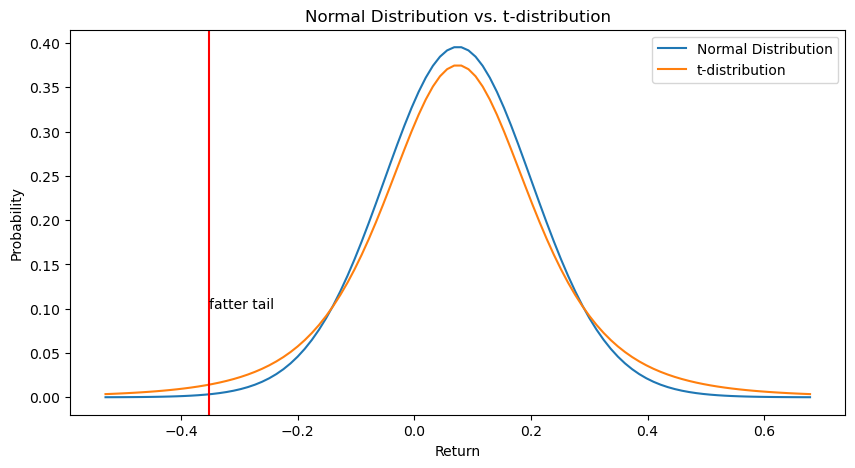

In [174]:
firstT = t.pdf(stdt,30)
secondT = t.pdf(stdt,4)

plt.figure(figsize = (10, 5))
plt.xlabel('Return')
plt.ylabel('Probability')
plt.title('Normal Distribution vs. t-distribution')
plt.plot(x, firstT, x, secondT)
plt.axvline(norm.ppf(0.05,retop2,stdop2), color='red')
plt.text(norm.ppf(0.05,retop2,stdop2),0.1,"fatter tail")
plt.legend(['Normal Distribution',"t-distribution"]);

# Appendix

## Proposed vs Optimal Portfolio in MKT1

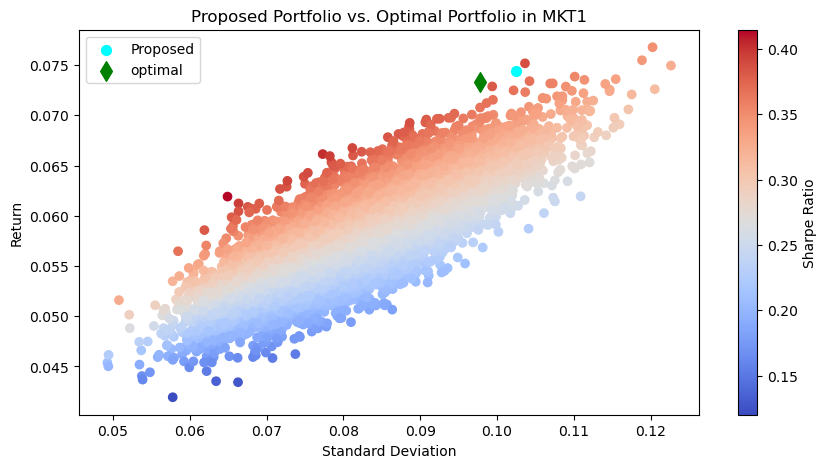

In [175]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport1["std"],y=simport1["ret"],c=simport1["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.scatter(x=stdop1,y=retop1,color="cyan",s=200, marker=".", label='Proposed')
plt.scatter(x=stdo1,y=reto1,color="green",s=100,marker="d", label='optimal')
#plt.scatter(x=0,y=0.035,color="orange",s=100, marker="s", label='Risk-free')
#plt.plot([0,stdop1],[0.035,retop1],color="black")
#plt.plot([0,stdo1],[0.035,reto1],color="black")
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Proposed Portfolio vs. Optimal Portfolio in MKT1')
plt.legend();

## Proposed vs Optimal Portfolio in MKT2

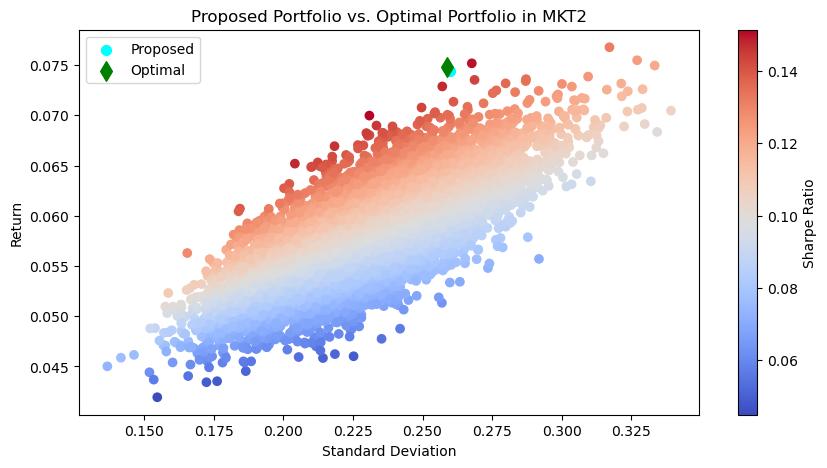

In [176]:
plt.figure(figsize = (10, 5))
plt.scatter(x=simport2["std"],y=simport2["ret"],c=simport2["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.scatter(x=stdop2,y=retop2,color="cyan",s=200, marker=".", label='Proposed')
plt.scatter(x=stdo2,y=reto2,color="green",s=100,marker="d", label='Optimal')
#plt.scatter(x=0,y=0.035,color="orange",s=100, marker="s", label='Risk-free')
#plt.plot([0,stdop2],[0.035,retop2],color="black")
#plt.plot([0,stdo2],[0.035,reto2],color="black")
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Proposed Portfolio vs. Optimal Portfolio in MKT2')
plt.legend();